## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Aug 14 14:01:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 51.0/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 49.4ms
Speed: 10.3ms preprocess, 49.4ms inference, 125.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


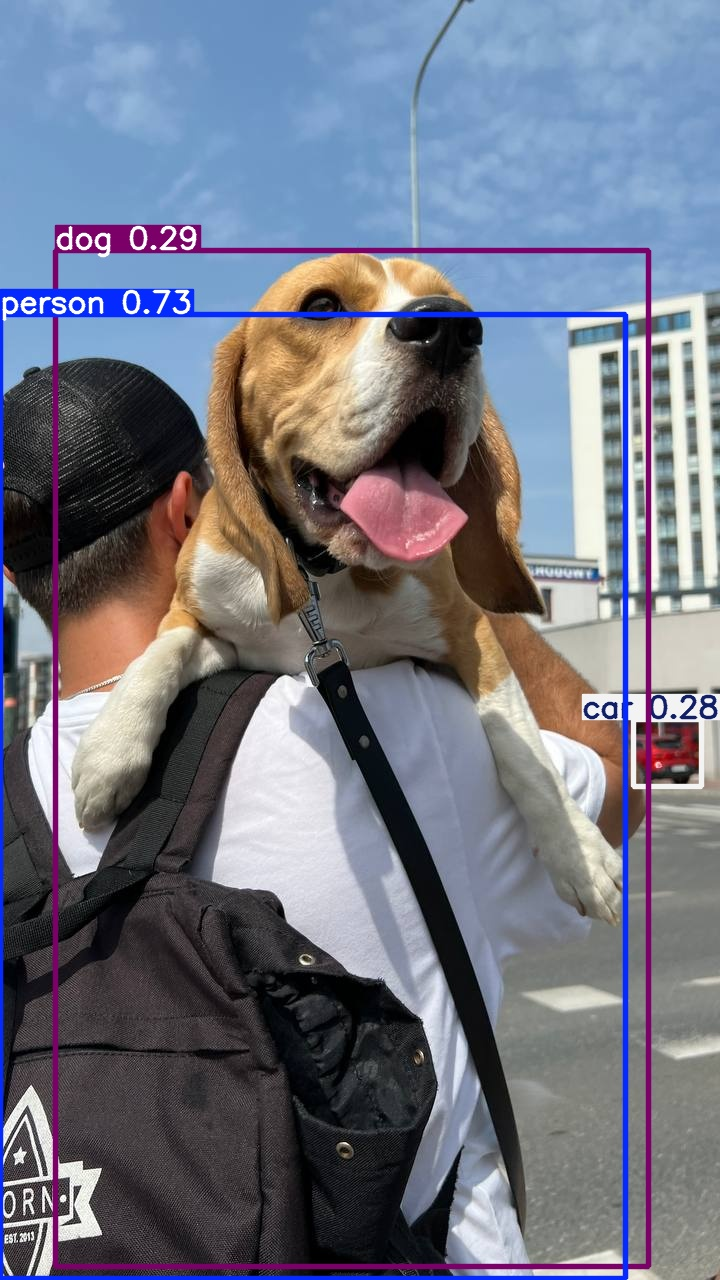

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
!pip install --upgrade --force-reinstall numpy

In [9]:
!pip install --upgrade --force-reinstall ultralytics opencv-python pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 916.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.7 MB/s eta 0:00:00
  Using cached ultralytics_thop-2.0.15-py3-none-any.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 

In [7]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 83.9ms
Speed: 7.9ms preprocess, 83.9ms inference, 229.2ms postprocess per image at shape (1, 3, 640, 384)


In [8]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4716,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [9]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [10]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

# **=== My Code ===**

### 1. Import Dataset

In [14]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow

# Login pakai API Key kamu sendiri
rf = Roboflow(api_key="SrL8ONudI9JwISF5voGY")

# Gunakan workspace dan project kamu sendiri
project = rf.workspace("zumaku").project("bundacare-model-qpxyd-zszni")

# Unduh versi dataset yang kamu mau
dataset = project.version(2).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to BundaCare-Model-2 in yolov8:: 100%|██████████| 27302/27302 [00:06<00:00, 4012.27it/s]


### 2. Train Model

In [15]:
from ultralytics import YOLO

# Buat model YOLOv8 baru (nano, kecil, cepat untuk eksperimen)
model = YOLO("yolov8n.pt")

# Latih model
model.train(
    data="/content/datasets/BundaCare-Model-2/data.yaml",  # path file data.yaml
    epochs=50,                                 # jumlah epoch
    batch=16,                                  # ukuran batch
    imgsz=640                                  # resolusi gambar
)

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/BundaCare-Model-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

Overriding model.yaml nc=80 with nc=47

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    760477  ultralytics.nn.modules.head.Detect           [47, [64, 128, 256]]          
Model summary: 129 layers, 3,020,013 parameters, 3,019,997 gradients, 8.2 GFLOPs

Transf

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1449.3±509.4 MB/s, size: 61.3 KB)


train: Scanning /content/datasets/BundaCare-Model-2/train/labels... 12267 images, 42 backgrounds, 0 corrupt: 100%|██████████| 12267/12267 [00:06<00:00, 1989.78it/s]


train: New cache created: /content/datasets/BundaCare-Model-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3804, len(boxes) = 26475. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 454.6±110.6 MB/s, size: 67.4 KB)


val: Scanning /content/datasets/BundaCare-Model-2/valid/labels... 983 images, 0 backgrounds, 0 corrupt: 100%|██████████| 983/983 [00:00<00:00, 1020.69it/s]

val: New cache created: /content/datasets/BundaCare-Model-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000196, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.18G     0.8475      4.033      1.372         43        640: 100%|██████████| 767/767 [03:44<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.31it/s]

                   all        983       2446      0.262      0.277      0.232      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.66G     0.8271      2.881      1.357         63        640: 100%|██████████| 767/767 [03:31<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.59it/s]


                   all        983       2446        0.4      0.467      0.409      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.68G     0.7779      2.343      1.316         41        640: 100%|██████████| 767/767 [03:28<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.54it/s]

                   all        983       2446      0.516      0.508      0.496      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.7G     0.7563       2.07      1.297         47        640: 100%|██████████| 767/767 [03:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.63it/s]


                   all        983       2446      0.539      0.569      0.552      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.71G     0.7348      1.895      1.275         59        640: 100%|██████████| 767/767 [03:31<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.63it/s]


                   all        983       2446      0.621      0.571      0.593      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.73G     0.7109      1.746      1.256         64        640: 100%|██████████| 767/767 [03:33<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.52it/s]


                   all        983       2446      0.674      0.574      0.646      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.75G     0.6931      1.631       1.24         37        640: 100%|██████████| 767/767 [03:33<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.61it/s]


                   all        983       2446      0.661      0.644      0.662      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.77G     0.6872      1.567      1.238         55        640: 100%|██████████| 767/767 [03:32<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]


                   all        983       2446      0.668      0.606       0.67       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.79G     0.6735      1.473      1.222         50        640: 100%|██████████| 767/767 [03:33<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.76it/s]

                   all        983       2446      0.723       0.63      0.694      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.8G     0.6707      1.417      1.218         50        640: 100%|██████████| 767/767 [03:31<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.56it/s]

                   all        983       2446      0.717      0.638      0.684       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.82G      0.657      1.351      1.207         49        640: 100%|██████████| 767/767 [03:27<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.79it/s]

                   all        983       2446      0.701      0.661       0.71       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.84G     0.6464      1.305      1.199         49        640: 100%|██████████| 767/767 [03:21<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.72it/s]

                   all        983       2446      0.731      0.664      0.712      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.85G     0.6362      1.268      1.191         60        640: 100%|██████████| 767/767 [03:21<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.04it/s]


                   all        983       2446      0.731      0.663      0.719      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.87G      0.634      1.225      1.191         53        640: 100%|██████████| 767/767 [03:18<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.23it/s]


                   all        983       2446      0.752       0.67      0.722        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.89G     0.6242      1.188      1.181         59        640: 100%|██████████| 767/767 [03:17<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.94it/s]


                   all        983       2446      0.738      0.681      0.731      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.9G     0.6216      1.164       1.18         38        640: 100%|██████████| 767/767 [03:18<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.79it/s]


                   all        983       2446      0.716      0.699      0.736      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.92G     0.6091       1.12      1.168         52        640: 100%|██████████| 767/767 [03:22<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.18it/s]


                   all        983       2446       0.78      0.667      0.739      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.94G     0.6009      1.095      1.162         68        640: 100%|██████████| 767/767 [03:20<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.31it/s]


                   all        983       2446      0.766      0.661      0.737      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.96G     0.5994      1.068      1.163         61        640: 100%|██████████| 767/767 [03:26<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.62it/s]


                   all        983       2446      0.727      0.691      0.729      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.97G     0.5966      1.059       1.16         39        640: 100%|██████████| 767/767 [03:28<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.78it/s]

                   all        983       2446      0.777      0.678       0.75      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.99G     0.5896      1.033      1.153         34        640: 100%|██████████| 767/767 [03:25<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.73it/s]

                   all        983       2446      0.753      0.706      0.748      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.01G     0.5866      1.003      1.152         44        640: 100%|██████████| 767/767 [03:23<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.23it/s]


                   all        983       2446      0.741      0.701      0.748      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.03G     0.5782     0.9882      1.145         51        640: 100%|██████████| 767/767 [03:21<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.78it/s]


                   all        983       2446      0.748      0.727      0.758      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.04G     0.5766     0.9746      1.144         38        640: 100%|██████████| 767/767 [03:21<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.79it/s]


                   all        983       2446      0.766      0.713      0.758      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.06G       0.57     0.9617      1.139         47        640: 100%|██████████| 767/767 [03:21<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.80it/s]


                   all        983       2446      0.767      0.695      0.755      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.08G     0.5643     0.9328      1.133         53        640: 100%|██████████| 767/767 [03:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.13it/s]


                   all        983       2446      0.784      0.698      0.756      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.09G     0.5612     0.9257       1.13         46        640: 100%|██████████| 767/767 [03:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.21it/s]


                   all        983       2446      0.765      0.718      0.764       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.11G     0.5539     0.9066      1.127         70        640: 100%|██████████| 767/767 [03:21<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.33it/s]


                   all        983       2446      0.766      0.708       0.76       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.13G     0.5525     0.8917      1.124         38        640: 100%|██████████| 767/767 [03:23<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.74it/s]


                   all        983       2446      0.789      0.684      0.752      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.14G     0.5523     0.8865      1.123         52        640: 100%|██████████| 767/767 [03:21<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.71it/s]


                   all        983       2446      0.781      0.712      0.762      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.16G     0.5464     0.8633      1.117         47        640: 100%|██████████| 767/767 [03:20<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]


                   all        983       2446      0.767      0.719      0.762      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.18G     0.5424     0.8514      1.116         51        640: 100%|██████████| 767/767 [03:19<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.06it/s]


                   all        983       2446      0.778      0.702      0.763      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       3.2G     0.5407     0.8463      1.115         37        640: 100%|██████████| 767/767 [03:19<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.19it/s]

                   all        983       2446      0.748      0.731      0.767      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.21G     0.5335     0.8321      1.111         42        640: 100%|██████████| 767/767 [03:20<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.16it/s]


                   all        983       2446      0.773      0.725      0.771      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.23G     0.5313     0.8195      1.108         53        640: 100%|██████████| 767/767 [03:20<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.19it/s]


                   all        983       2446      0.786      0.701      0.764      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.25G     0.5282     0.8113      1.107         37        640: 100%|██████████| 767/767 [03:19<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.29it/s]


                   all        983       2446      0.782      0.719       0.77      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.26G     0.5245     0.7994      1.102         52        640: 100%|██████████| 767/767 [03:21<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.77it/s]

                   all        983       2446      0.796       0.71      0.774      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.28G     0.5202      0.792      1.101         42        640: 100%|██████████| 767/767 [03:18<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.76it/s]

                   all        983       2446      0.793      0.711       0.77      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       3.3G     0.5164     0.7791      1.098         39        640: 100%|██████████| 767/767 [03:24<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.69it/s]

                   all        983       2446      0.768      0.732       0.77      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.32G     0.5142     0.7698      1.097         40        640: 100%|██████████| 767/767 [03:29<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.69it/s]


                   all        983       2446      0.778      0.721      0.768      0.651
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.33G     0.4375     0.6387       1.05         13        640: 100%|██████████| 767/767 [03:13<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.39it/s]


                   all        983       2446      0.774      0.725      0.765      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.35G     0.4244     0.5933      1.043         16        640: 100%|██████████| 767/767 [03:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]


                   all        983       2446      0.793      0.718       0.77       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.37G     0.4151     0.5609      1.031         21        640: 100%|██████████| 767/767 [03:09<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.78it/s]

                   all        983       2446      0.794      0.712      0.768      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.38G     0.4098     0.5541      1.029         30        640: 100%|██████████| 767/767 [03:16<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.74it/s]


                   all        983       2446      0.799      0.711      0.768      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       3.4G     0.4038     0.5338      1.024         28        640: 100%|██████████| 767/767 [03:15<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.23it/s]

                   all        983       2446      0.806      0.706      0.767       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.42G     0.3998     0.5295      1.017         19        640: 100%|██████████| 767/767 [03:13<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.69it/s]


                   all        983       2446      0.797      0.713      0.767      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.44G     0.3937     0.5215      1.012         21        640: 100%|██████████| 767/767 [03:13<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.75it/s]


                   all        983       2446      0.783      0.716      0.765      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.45G     0.3905     0.5099      1.009         18        640: 100%|██████████| 767/767 [03:15<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.27it/s]


                   all        983       2446      0.785      0.715      0.765      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.47G     0.3879     0.5046       1.01         17        640: 100%|██████████| 767/767 [03:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.76it/s]


                   all        983       2446      0.795      0.716      0.766       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.49G     0.3839     0.4954      1.004         23        640: 100%|██████████| 767/767 [03:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.24it/s]


                   all        983       2446      0.801      0.709      0.767      0.651

50 epochs completed in 2.927 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,014,813 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  3.02it/s]


                   all        983       2446      0.795       0.71      0.774      0.653
            ayam bakar         20         43      0.713      0.651      0.724      0.586
           ayam goreng         68         86      0.654      0.417      0.511      0.372
                 bakso         34        193      0.794      0.781      0.859      0.786
                bakwan         26        116      0.718      0.448      0.587      0.454
                 bihun         47         47      0.892      0.894      0.954      0.825
                capcay         45         45      0.924      0.711      0.812      0.727
             gado-gado         52         52      0.909      0.788      0.908      0.773
           ikan goreng         37         59      0.882      0.746      0.854      0.537
               kerupuk         27        136       0.79      0.588      0.747      0.599
        martabak telur         29        142      0.789      0.803      0.873      0.763
                   mi

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  9, 13, 15, 16, 21, 22, 23, 25, 26, 27, 30, 34, 35, 36, 39, 40, 41, 42, 43, 45, 46])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7978ac0ec210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

Save model

In [19]:
from google.colab import files
files.download('/content/datasets/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test Model


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


image 1/1 /content/datasets/resep-udang-goreng-saus-bawang_43.jpeg: 480x640 1 udang, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


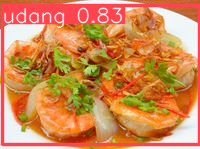

In [21]:
# Load model hasil training
model = YOLO("/content/datasets/runs/detect/train/weights/best.pt")

# Tes pada gambar
results = model.predict(source="https://akcdn.detik.net.id/community/media/visual/2022/02/08/resep-udang-goreng-saus-bawang_43.jpeg", conf=0.25)

# Tampilkan
for r in results:
    r.show()


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


image 1/1 /content/datasets/es_pisang_ijo1.jpg: 448x640 1 es pisang ijo, 236.3ms
Speed: 2.7ms preprocess, 236.3ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


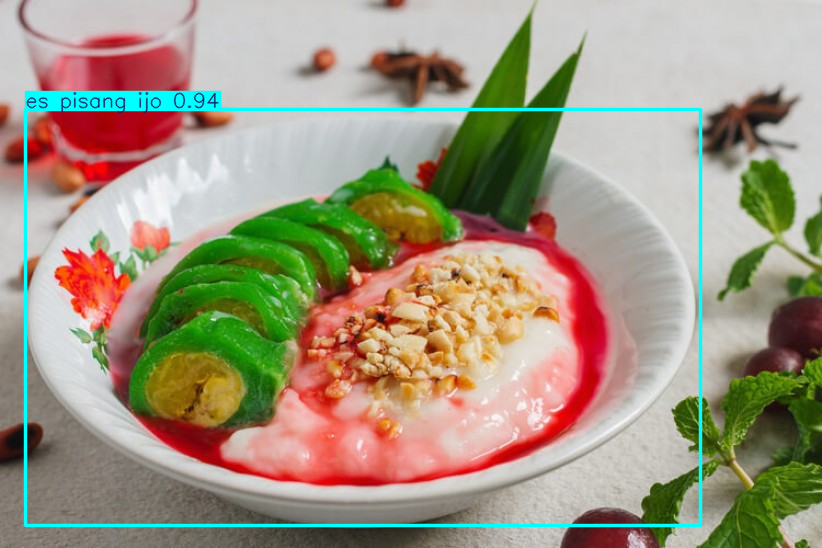

In [25]:
# Load model hasil training
model = YOLO("/content/datasets/runs/detect/train/weights/best.pt")

# Tes pada gambar
results = model.predict(source="https://buckets.sasa.co.id/v1/AUTH_Assets/Assets/p/website/medias/page_medias/es_pisang_ijo1.jpg", conf=0.25)

# Tampilkan
for r in results:
    r.show()


### 3. Evaluai Model

In [22]:
from ultralytics import YOLO

# Load model hasil training
model = YOLO("/content/datasets/runs/detect/train/weights/best.pt")

# Evaluasi model
metrics = model.val(
    data="/content/datasets/BundaCare-Model-2/data.yaml",
    split="val",
    plots=True
)

print(metrics)  # Menampilkan metrik mAP, precision, recall, dll

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
Model summary (fused): 72 layers, 3,014,813 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1343.6±461.6 MB/s, size: 47.7 KB)


val: Scanning /content/datasets/BundaCare-Model-2/valid/labels.cache... 983 images, 0 backgrounds, 0 corrupt: 100%|██████████| 983/983 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/62 [00:00<?, ?it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 2/62 [00:01<00:44,  1.36it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▍         | 3/62 [00:02<00:36,  1.63it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 5/62 [00:03<00:29,  1.92it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▍        | 9/62 [00:03<00:11,  4.63it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  19%|█▉        | 12/62 [00:04<00:08,  6.21it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  26%|██▌       | 16/62 [00:04<00:06,  6.97it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  31%|███       | 19/62 [00:04<00:05,  7.27it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  35%|███▌      | 22/62 [00:05<00:06,  6.57it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 25/62 [00:05<00:06,  5.73it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▎     | 27/62 [00:06<00:06,  5.74it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 30/62 [00:06<00:06,  5.15it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  53%|█████▎    | 33/62 [00:07<00:05,  5.11it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  58%|█████▊    | 36/62 [00:08<00:04,  5.78it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  63%|██████▎   | 39/62 [00:08<00:03,  6.98it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  69%|██████▉   | 43/62 [00:08<00:02,  7.41it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  76%|███████▌  | 47/62 [00:09<00:01,  7.70it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  81%|████████  | 50/62 [00:09<00:01,  7.68it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  87%|████████▋ | 54/62 [00:10<00:01,  7.71it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  94%|█████████▎| 58/62 [00:10<00:00,  7.98it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  98%|█████████▊| 61/62 [00:11<00:00,  7.87it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:11<00:00,  5.31it/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
                   all        983       2446      0.794      0.711      0.774      0.653
            ayam bakar         20         43      0.708      0.651      0.722      0.585
           ayam goreng         68         86      0.644      0.419      0.511      0.372
                 bakso         34        193      0.796       0.79      0.859      0.785
                bakwan         26        116      0.717      0.448      0.586      0.454
                 bihun         47         47      0.891      0.894      0.955      0.82

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


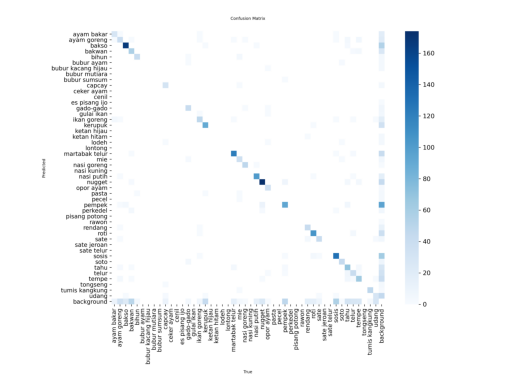

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('runs/detect/train/confusion_matrix.png')
plt.imshow(img)
plt.axis('off')
plt.show()

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


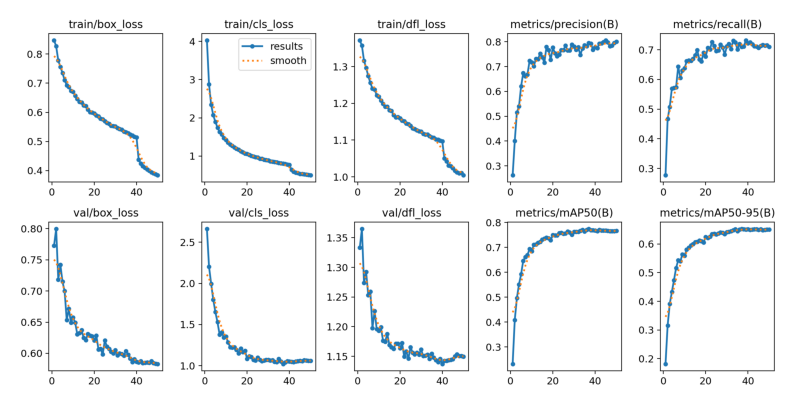

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path ke file results.png
img = mpimg.imread('runs/detect/train/results.png')

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

### Regresi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file

Saving b0be084c-e37b-4f7f-8bf4-e91350bd4ff3.jpg to b0be084c-e37b-4f7f-8bf4-e91350bd4ff3.jpg

image 1/1 /content/b0be084c-e37b-4f7f-8bf4-e91350bd4ff3.jpg: 416x640 7 perkedels, 266.9ms
Speed: 13.5ms preprocess, 266.9ms inference, 34.9ms postprocess per image at shape (1, 3, 416, 640)


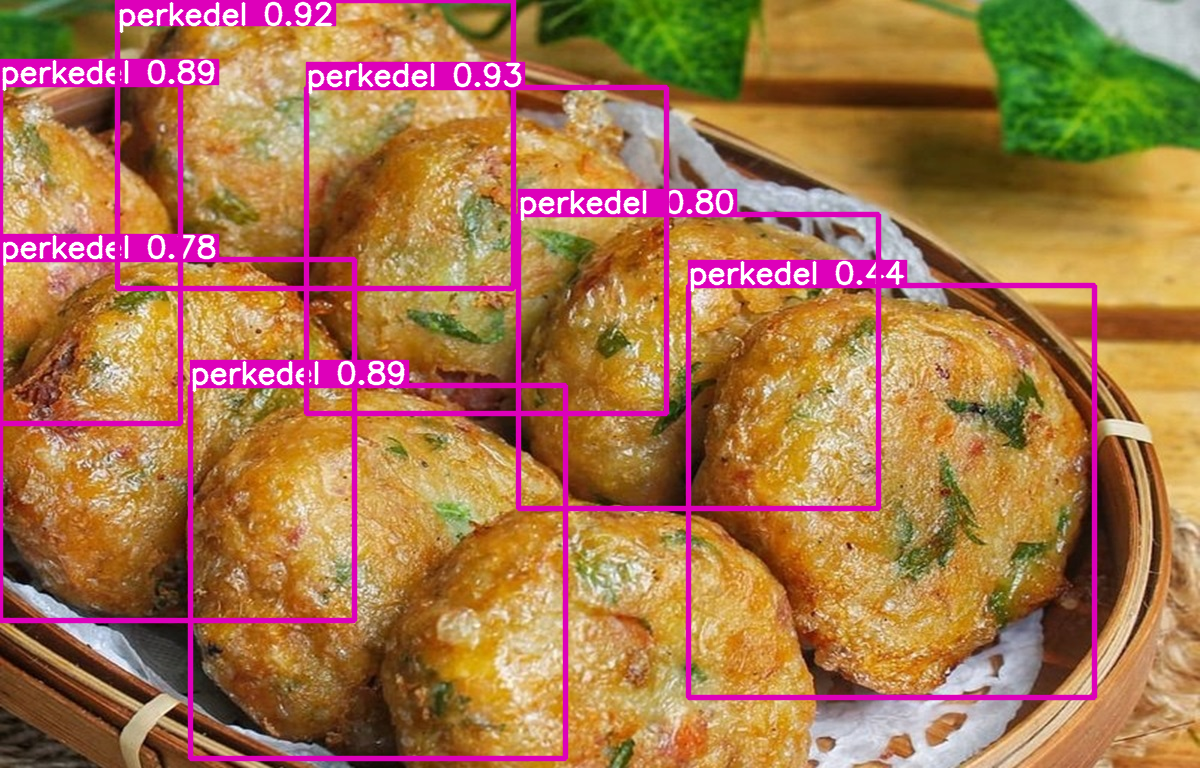

Jumlah Deteksi: {'perkedel': 7}

=== Total Nutrisi dari Gambar ===
Kalori: 1120 kcal
Protein: 21.0 g
Lemak: 63.0 g
Karbohidrat: 105.0 g


In [1]:
# Install library yang dibutuhkan
!pip install ultralytics pandas matplotlib --quiet

import pandas as pd
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# ==== 1. Load Dataset Nutrisi ====
nutrition_df = pd.read_csv("/content/nutrition.csv")

# ==== 2. Load Model YOLO ====
# Ganti path ini ke model hasil training-mu
model_path = "/content/datasets/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

# ==== 3. Fungsi Hitung Nutrisi ====
def calculate_nutrition(class_name, count):
    row = nutrition_df[nutrition_df["class"] == class_name].iloc[0]
    return {
        "kcal": row["kcal_per_100g"] * count,
        "protein": row["protein_g_per_100g"] * count,
        "fat": row["fat_g_per_100g"] * count,
        "carb": row["carb_g_per_100g"] * count
    }

# ==== 4. Upload dan Deteksi Gambar ====
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Jalankan deteksi
results = model(img_path)

# Tampilkan gambar hasil deteksi
results[0].show()

# ==== 5. Hitung Jumlah Tiap Class ====
counts = {}
for box in results[0].boxes:
    class_id = int(box.cls)
    class_name = model.names[class_id]
    counts[class_name] = counts.get(class_name, 0) + 1

print("Jumlah Deteksi:", counts)

# ==== 6. Hitung Total Nutrisi ====
total_nutrition = {"kcal": 0, "protein": 0, "fat": 0, "carb": 0}

for cls, cnt in counts.items():
    if cls in nutrition_df["class"].values:
        nut = calculate_nutrition(cls, cnt)
        for k in total_nutrition:
            total_nutrition[k] += nut[k]
    else:
        print(f"⚠️ Class '{cls}' tidak ditemukan di dataset nutrisi.")

print("\n=== Total Nutrisi dari Gambar ===")
print(f"Kalori: {total_nutrition['kcal']} kcal")
print(f"Protein: {total_nutrition['protein']} g")
print(f"Lemak: {total_nutrition['fat']} g")
print(f"Karbohidrat: {total_nutrition['carb']} g")